In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error, r2_score

rcParams["figure.figsize"] = 18, 6


In [2]:
df = pd.read_csv("data/stocks_info.csv")

In [3]:
df.head()

,Date,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
0,2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
1,2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2,2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
3,2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
4,2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df["Date"]
df.drop("Date", axis=1, inplace=True)
df.head()

,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
Date,,,,,,,,,,,,,,,,,
2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 2017-01-02 to 2024-12-30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close PETR4    1992 non-null   float64
 1   Volume PETR4   1992 non-null   int64  
 2   Close ITUB4    1992 non-null   float64
 3   Volume ITUB4   1992 non-null   int64  
 4   Close VALE3    1992 non-null   float64
 5   Volume VALE3   1992 non-null   int64  
 6   Close BBAS3    1992 non-null   float64
 7   Volume BBAS3   1992 non-null   int64  
 8   Close BBSE3    1992 non-null   float64
 9   Volume BBSE3   1992 non-null   int64  
 10  Close B3SA3    1992 non-null   float64
 11  Volume B3SA3   1992 non-null   int64  
 12  Close SAPR11   1742 non-null   float64
 13  Volume SAPR11  1742 non-null   float64
 14  SELIC          1986 non-null   float64
 15  IPCA           1992 non-null   float64
 16  Cambio         1986 non-null   float64
dtypes: float64(11), int64(6)
memory us

In [6]:
stocks_list = ["PETR4", "ITUB4", "VALE3", "BBAS3", "BBSE3", "B3SA3", "SAPR11"]

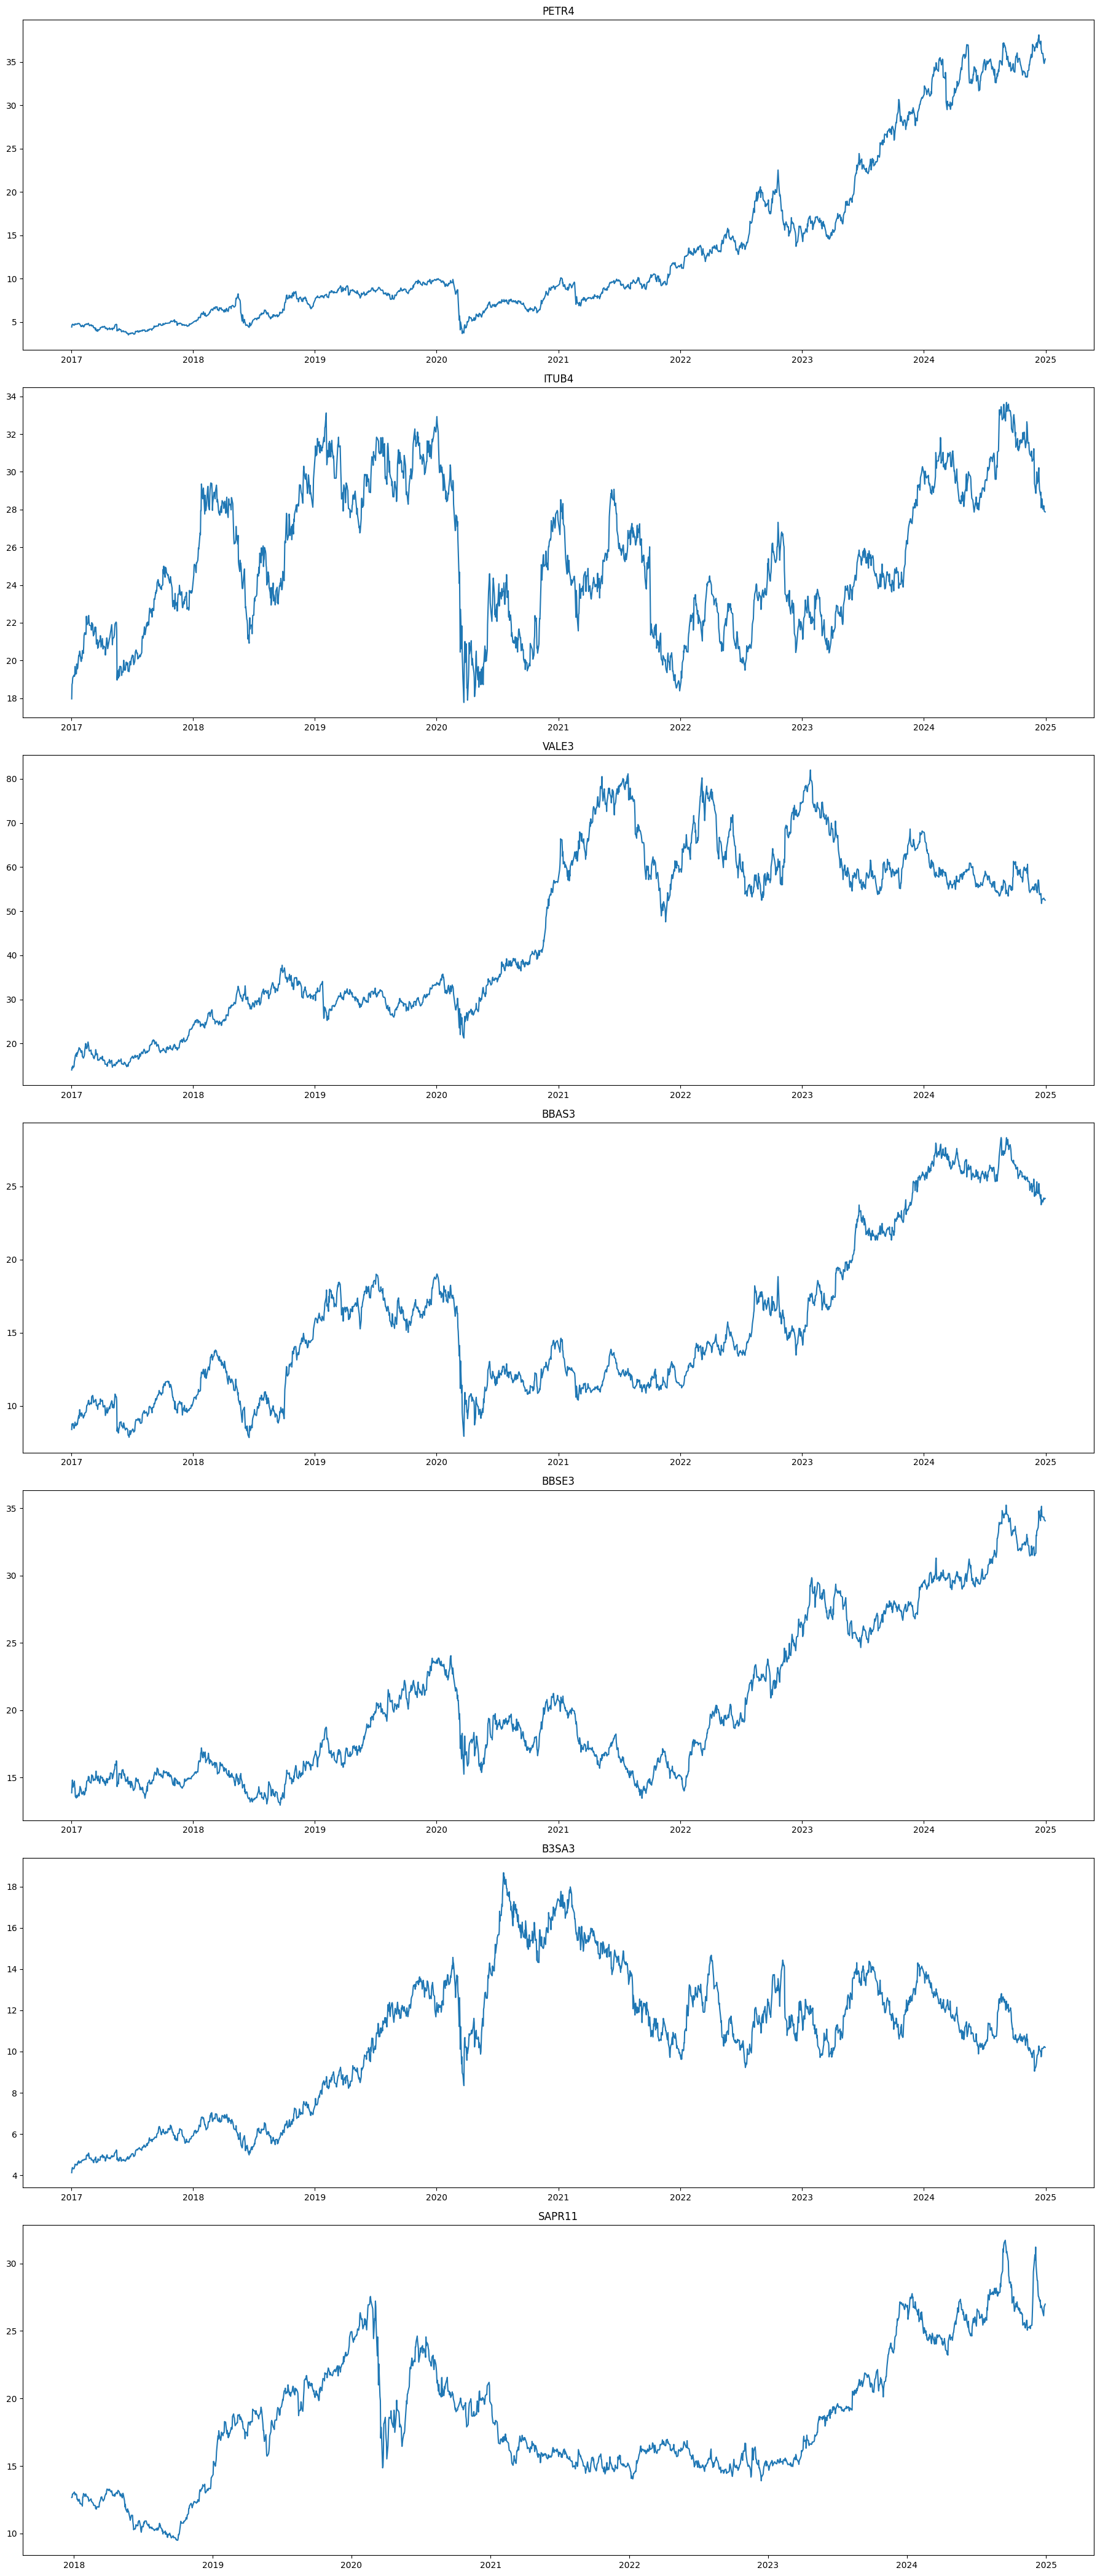

In [7]:
graphic_height = 6
fig, axs = plt.subplots(len(stocks_list), figsize=(18, graphic_height * len(stocks_list)))

for i, stock in enumerate(stocks_list):
    axs[i].plot(df[f"Close {stock}"])
    axs[i].set_title(f"{stock}")

plt.tight_layout()
plt.show()

In [8]:
df_2021 = df.loc[df.index.year >= 2021]
df_2024 = df.loc[df.index.year >= 2024]

<Axes: >

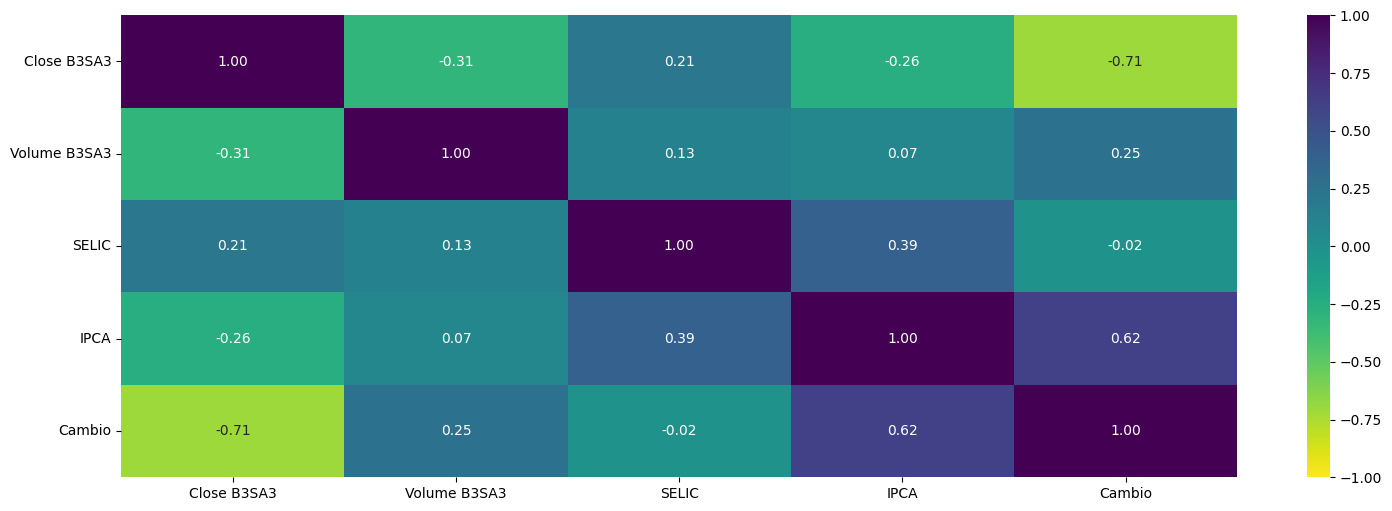

In [9]:
sns.heatmap(df_2024[["Close B3SA3", "Volume B3SA3", "SELIC", "IPCA", "Cambio"]].corr(), vmin=-1, vmax=1, cmap="viridis_r", annot=True, fmt='.2f')

In [10]:
df_bbas = df[["Close BBAS3", "Volume BBAS3", "SELIC", "IPCA", "Cambio"]]

In [11]:
bb_series = pd.Series(df["Close BBAS3"])
bb_series

Date
2017-01-02     8.390503
2017-01-03     8.774381
2017-01-04     8.728682
2017-01-05     8.707357
2017-01-06     8.801803
                ...    
2024-12-20    24.080000
2024-12-23    23.920000
2024-12-26    24.200001
2024-12-27    24.110001
2024-12-30    24.170000
Name: Close BBAS3, Length: 1992, dtype: float64

In [12]:
# Criando Features -> Lags
df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
df_bbas["Lag 5"] = df["Close BBAS3"].shift(5)

C:\Users\felip\AppData\Local\Temp\ipykernel_21880\2461175989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
C:\Users\felip\AppData\Local\Temp\ipykernel_21880\2461175989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
C:\Users\felip\AppData\Local\Temp\ipykernel_21880\2461175989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [13]:
# Criando Features -> Médias móveis
df_bbas["ma_5d"] = bb_series.rolling(window=5).mean()
df_bbas["ma_10d"] = bb_series.rolling(window=10).mean()
df_bbas["ma_20d"] = bb_series.rolling(window=20).mean()
df_bbas.head(20)

C:\Users\felip\AppData\Local\Temp\ipykernel_21880\4124485195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["ma_5d"] = bb_series.rolling(window=5).mean()
C:\Users\felip\AppData\Local\Temp\ipykernel_21880\4124485195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["ma_10d"] = bb_series.rolling(window=10).mean()
C:\Users\felip\AppData\Local\Temp\ipykernel_21880\4124485195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Close BBAS3,Volume BBAS3,SELIC,IPCA,Cambio,Lag 1,Lag 3,Lag 5,ma_5d,ma_10d,ma_20d
Date,,,,,,,,,,,
2017-01-02,8.390503,3936400,0.1375,0.05354,3.2723,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,8.774381,15157800,0.1375,0.05354,3.2626,8.390503,NaN,NaN,NaN,NaN,NaN
2017-01-04,8.728682,8312600,0.1375,0.05354,3.2327,8.774381,NaN,NaN,NaN,NaN,NaN
2017-01-05,8.707357,10914200,0.1375,0.05354,3.2123,8.728682,8.390503,NaN,NaN,NaN,NaN
2017-01-06,8.801803,7384800,0.1375,0.05354,3.2051,8.707357,8.774381,NaN,8.680545,NaN,NaN
2017-01-09,8.469719,30980400,0.1375,0.05354,3.2091,8.801803,8.728682,8.390503,8.696388,NaN,NaN
2017-01-10,8.585491,10895200,0.1375,0.05354,3.1912,8.469719,8.707357,8.774381,8.658610,NaN,NaN
2017-01-11,8.676892,11368400,0.1375,0.05354,3.2148,8.585491,8.801803,8.728682,8.648252,NaN,NaN
2017-01-12,8.896250,18930200,0.1300,0.05354,3.1655,8.676892,8.469719,8.707357,8.686031,NaN,NaN


In [14]:
# Decomposição da série Temporal em seus componentes (Tendência, Sazonal e Resíduos)
from statsmodels.tsa.seasonal import seasonal_decompose

# decompa = seasonal_decompose(bb_series, model="additive", period=5)  # Método aditivo
decompa = seasonal_decompose(bb_series, model="multiplicative", period=5) # Método multiplicativo

print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04     8.680545
2017-01-05     8.696388
2017-01-06     8.658610
                ...    
2024-12-20    23.966000
2024-12-23    24.040000
2024-12-26    24.096000
2024-12-27          NaN
2024-12-30          NaN
Name: trend, Length: 1992, dtype: float64
Date
2017-01-02    1.000188
2017-01-03    1.000400
2017-01-04    0.999785
2017-01-05    0.999483
2017-01-06    1.000143
                ...   
2024-12-20    0.999785
2024-12-23    0.999483
2024-12-26    1.000143
2024-12-27    1.000188
2024-12-30    1.000400
Name: seasonal, Length: 1992, dtype: float64
Date
2017-01-02         NaN
2017-01-03         NaN
2017-01-04    1.005761
2017-01-05    1.001779
2017-01-06    1.016392
                ...   
2024-12-20    1.004973
2024-12-23    0.995523
2024-12-26    1.004172
2024-12-27         NaN
2024-12-30         NaN
Name: resid, Length: 1992, dtype: float64


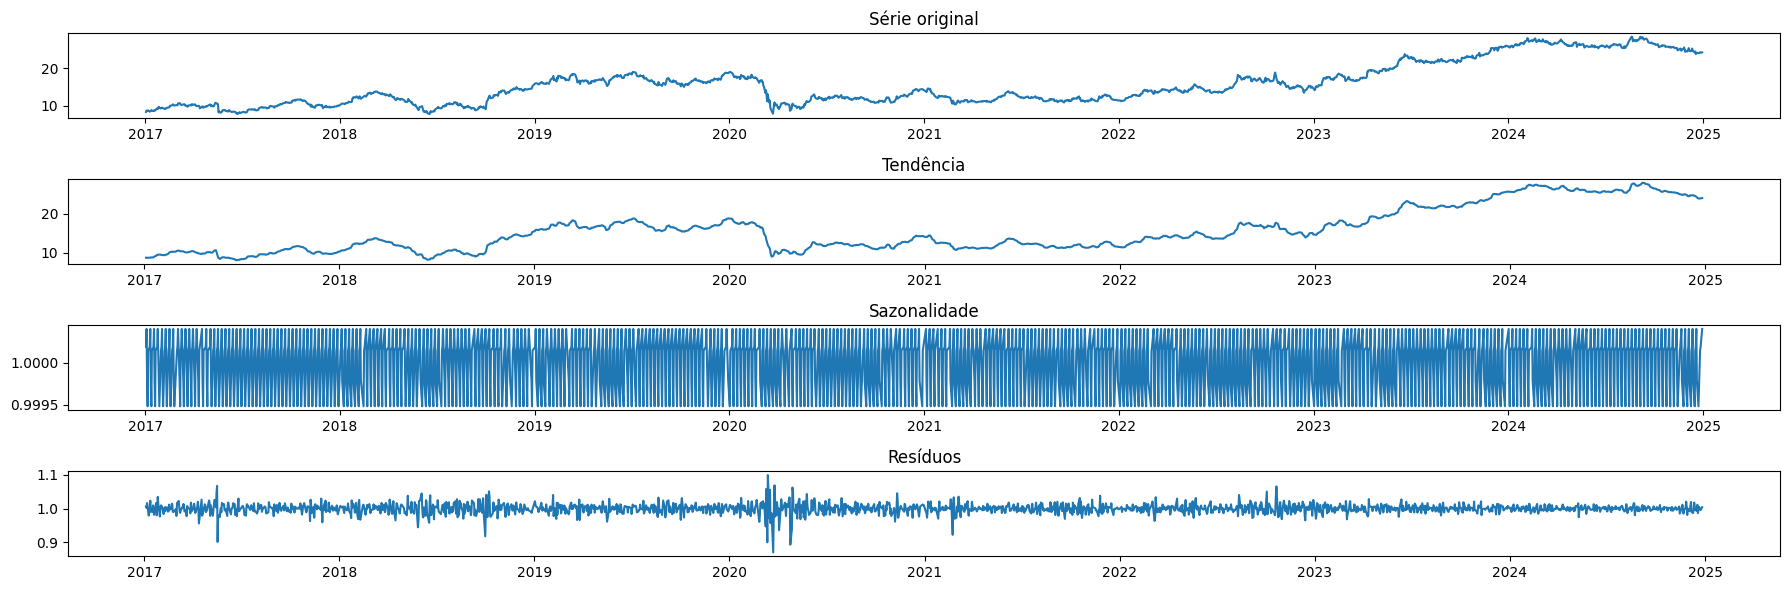

In [15]:
# Plotando as séries

plt.subplot(4, 1, 1)
plt.plot(bb_series)
plt.title("Série original")

plt.subplot(4, 1, 2)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(4, 1, 3)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(4, 1, 4)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.tight_layout()
plt.show()

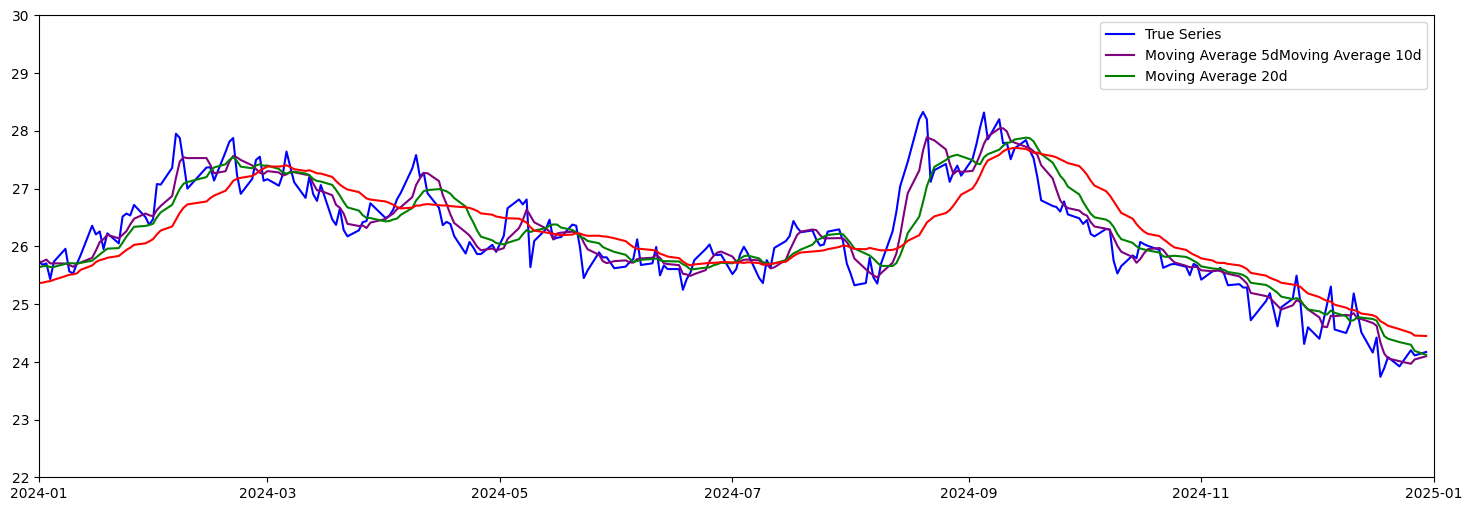

In [16]:
plt.plot(bb_series, 'blue')
plt.plot(df_bbas["ma_5d"], 'purple')
plt.plot(df_bbas["ma_10d"], 'green')
plt.plot(df_bbas["ma_20d"], 'red')
plt.legend(["True Series", "Moving Average 5d" "Moving Average 10d", "Moving Average 20d"])
plt.ylim([22, 30])
plt.xlim([pd.Timestamp("2024-01-01"), pd.Timestamp("2025-01-01")])
plt.show()

Vamos testar os modelos mais simples, considerando o treino dos modelos como os anos de 2017 até 2023 e a base de teste como o ano de 2024.

Modelos a serem testados:
- Naive
- Média
- Drift
- Naive Sazonal
- Suavização Exponencial Simples (SES)
- Holt (SEH)
- Holt-Winters

In [17]:
train_conditions = (bb_series.index.year < 2024) &  (bb_series.index.year >= 2021)
test_conditions = (bb_series.index.year == 2024)
bb_series_train = bb_series[train_conditions]
bb_series_test = bb_series[test_conditions]
steps_ahead = len(bb_series_test)
seasonal = len(bb_series_train) // 3

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

In [19]:
# Comparandos os modelos

modelos = []
mapes = []
rmses = []
r2s = []

In [20]:
# Naive

naive_forecast = pd.Series([bb_series_train.iloc[-1]] * len(bb_series_test), index=bb_series_test.index)
print(naive_forecast)
mape_naive = mean_absolute_percentage_error(bb_series_test, naive_forecast) * 100
modelos.append("Naive")
mapes.append(mape_naive)
print(mape_naive)

Date
2024-01-02    25.975393
2024-01-03    25.975393
2024-01-04    25.975393
2024-01-05    25.975393
2024-01-08    25.975393
                ...    
2024-12-20    25.975393
2024-12-23    25.975393
2024-12-26    25.975393
2024-12-27    25.975393
2024-12-30    25.975393
Length: 251, dtype: float64
2.8263124060382125


In [21]:
# Média

mean_forecast = pd.Series(bb_series_train.mean(), index=bb_series_test.index)
print(mean_forecast)
mape_mean = mean_absolute_percentage_error(bb_series_test, mean_forecast)*100
modelos.append("Mean")
mapes.append(mape_mean)
print(mape_mean)


Date
2024-01-02    15.793671
2024-01-03    15.793671
2024-01-04    15.793671
2024-01-05    15.793671
2024-01-08    15.793671
                ...    
2024-12-20    15.793671
2024-12-23    15.793671
2024-12-26    15.793671
2024-12-27    15.793671
2024-12-30    15.793671
Length: 251, dtype: float64
39.64435172812959


In [22]:
n = len(bb_series_train)
drift_slope = (bb_series_train.iloc[-1] - bb_series_train.iloc[0]) / (n - 1)
drift_forecast = bb_series_train.iloc[-1] + drift_slope * np.arange(1, len(bb_series_test) + 1)
drift_forecast = pd.Series(drift_forecast, index=bb_series_test.index)
print(drift_forecast)
mape_drift = mean_absolute_percentage_error(bb_series_test, drift_forecast)*100
modelos.append("Drift")
mapes.append(mape_drift)
print(mape_drift)

Date
2024-01-02    25.991734
2024-01-03    26.008074
2024-01-04    26.024415
2024-01-05    26.040755
2024-01-08    26.057096
                ...    
2024-12-20    30.011495
2024-12-23    30.027836
2024-12-26    30.044176
2024-12-27    30.060517
2024-12-30    30.076857
Length: 251, dtype: float64
7.916712072622166


In [23]:
naive_sazonal_forecast = pd.Series([bb_series_train.iloc[-seasonal + (i % seasonal)]
                                    for i in range(len(bb_series_test))],
                                   index=bb_series_test.index)
print(naive_sazonal_forecast)
mape_naive_sazonal = mean_absolute_percentage_error(bb_series_test, naive_sazonal_forecast)*100
modelos.append("Naive Sazonal")
mapes.append(mape_naive_sazonal)
print(mape_naive_sazonal)

Date
2024-01-02    14.423563
2024-01-03    14.154695
2024-01-04    14.336832
2024-01-05    14.991658
2024-01-08    15.199817
                ...    
2024-12-20    25.726847
2024-12-23    25.975393
2024-12-26    14.423563
2024-12-27    14.154695
2024-12-30    14.336832
Length: 251, dtype: float64
21.63432298050627


In [24]:
ses_model = SimpleExpSmoothing(bb_series_train).fit()
ses_forecast = ses_model.forecast(steps=len(bb_series_test))
print(ses_forecast)
mape_ses = mean_absolute_percentage_error(bb_series_test, ses_forecast)*100
modelos.append("SES")
mapes.append(mape_ses)
print(mape_ses)

745    25.974421
746    25.974421
747    25.974421
748    25.974421
749    25.974421
         ...    
991    25.974421
992    25.974421
993    25.974421
994    25.974421
995    25.974421
Length: 251, dtype: float64
2.8267584858483246


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:
holt_model = Holt(bb_series_train).fit()
holt_forecast = holt_model.forecast(steps=len(bb_series_test))
print(holt_forecast)
mape_holt = mean_absolute_percentage_error(bb_series_test, holt_forecast)*100
modelos.append("Holt")
mapes.append(mape_holt)
print(mape_holt)

745    26.023272
746    26.072632
747    26.121992
748    26.171352
749    26.220711
         ...    
991    38.165790
992    38.215150
993    38.264510
994    38.313870
995    38.363230
Length: 251, dtype: float64
23.31069382409619


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
# Holt-Winters aditivo
hw_add_model = ExponentialSmoothing(bb_series_train, seasonal_periods=seasonal, trend='add', seasonal='add').fit()
hw_add_forecast = hw_add_model.forecast(steps=len(bb_series_test))
print(hw_add_forecast)
mape_hw_add = mean_absolute_percentage_error(bb_series_test, hw_add_forecast)*100
modelos.append("Holt-Winters Aditivo")
mapes.append(mape_hw_add)
print(mape_hw_add)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


745    25.680493
746    25.753947
747    26.031892
748    26.326690
749    26.360797
         ...    
991    35.072240
992    35.181656
993    34.886756
994    34.960210
995    35.238155
Length: 251, dtype: float64
20.01948620431761


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [27]:
hw_mult_model = ExponentialSmoothing(bb_series_train, seasonal_periods=seasonal, trend='add', seasonal='mul').fit()
hw_mult_forecast = hw_mult_model.forecast(steps=len(bb_series_test))
print(hw_mult_forecast)
mape_hw_mult = mean_absolute_percentage_error(bb_series_test, hw_mult_forecast)*100
modelos.append("Holt-Winters Multiplicativo")
mapes.append(mape_hw_mult)
print(mape_hw_mult)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


745    25.311318
746    25.365194
747    25.838280
748    26.355287
749    26.334887
         ...    
991    30.104540
992    30.278035
993    29.501686
994    29.561680
995    30.110185
Length: 251, dtype: float64
8.698606200365237


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
mape_comparison = pd.DataFrame({'Modelo': modelos, 'MAPE': mapes})
mape_comparison = mape_comparison.sort_values(by='MAPE', ascending=False).reset_index(drop=True)
print(mape_comparison)

                        Modelo       MAPE
0                         Mean  39.644352
1                         Holt  23.310694
2                Naive Sazonal  21.634323
3         Holt-Winters Aditivo  20.019486
4  Holt-Winters Multiplicativo   8.698606
5                        Drift   7.916712
6                          SES   2.826758
7                        Naive   2.826312


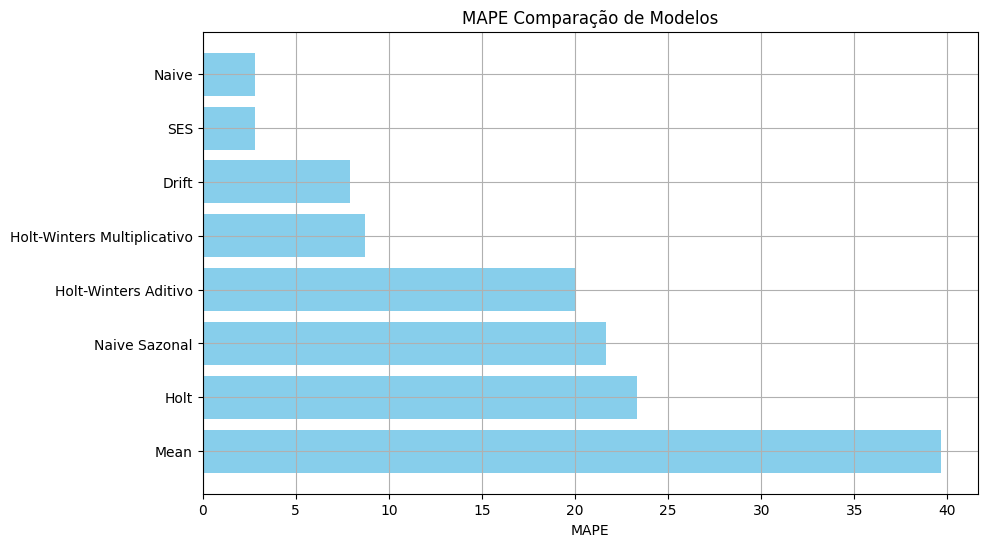

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(mape_comparison['Modelo'], mape_comparison['MAPE'], color='skyblue')
plt.xlabel("MAPE")
plt.title("MAPE Comparação de Modelos")
plt.grid(True)
plt.show()

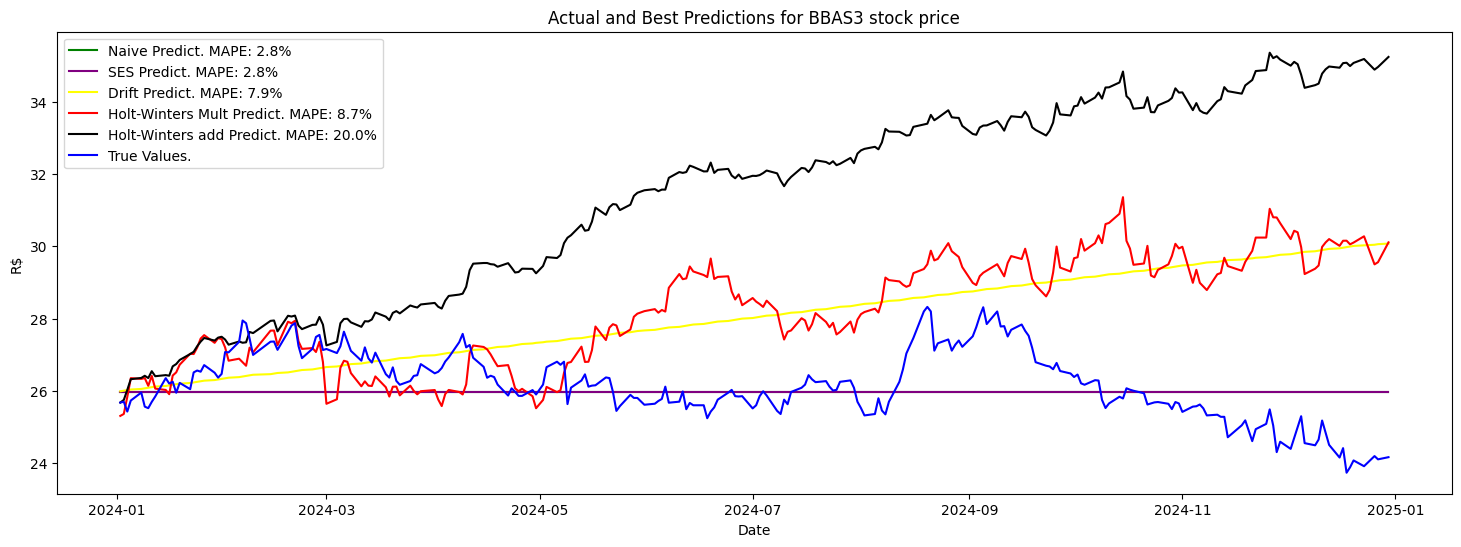

In [30]:
ses_forecast.index = bb_series_test.index
hw_add_forecast.index = bb_series_test.index
hw_mult_forecast.index = bb_series_test.index

plt.plot(naive_forecast, 'green', label=f'Naive Predict. MAPE: {mape_naive:.1f}%')
plt.plot(ses_forecast, 'purple', label=f'SES Predict. MAPE: {mape_ses:.1f}%')
plt.plot(drift_forecast, 'yellow', label=f"Drift Predict. MAPE: {mape_drift:.1f}%")
plt.plot(hw_mult_forecast, 'red', label=f'Holt-Winters Mult Predict. MAPE: {mape_hw_mult:.1f}%')
plt.plot(hw_add_forecast, 'black', label=f'Holt-Winters add Predict. MAPE: {mape_hw_add:.1f}%')
plt.plot(bb_series_test, 'blue', label=f'True Values.')
plt.legend()
plt.title("Actual and Best Predictions for BBAS3 stock price")
plt.ylabel("R$")
plt.xlabel("Date")
plt.show()

In [31]:
# Teste Ljung-Box nos resíduos
from statsmodels.stats.diagnostic import acorr_ljungbox

residuos = hw_mult_model.resid

ljungbox_result = acorr_ljungbox(residuos, lags=30, return_df=True)
print(f'Resultado do teste Ljung-box: {ljungbox_result.lb_pvalue.values[0]}')

Resultado do teste Ljung-box: 0.8134738914183526


Teste Ljung-box nos resíduos

- H0: p-value > 0.05 -> Os resíduos são independentes (iid). O modelo está bem ajustado
- H1: p-value <= 0.05 -> Os resíduos não são independentes, o modelo possui falhas no ajuste. 

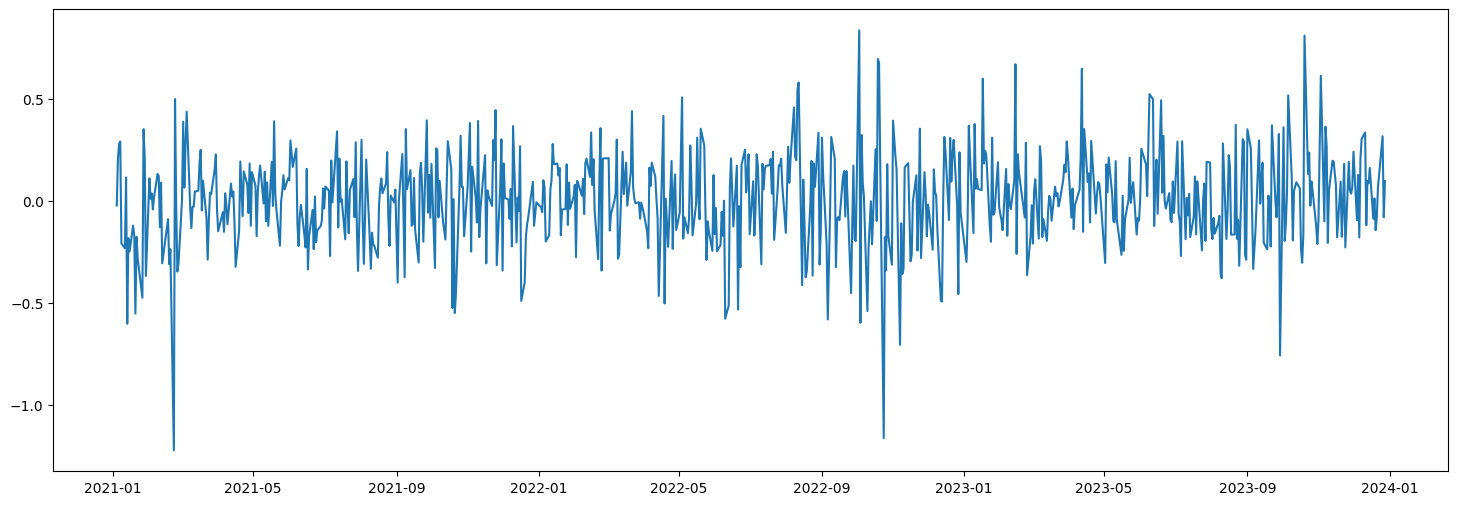

In [32]:
plt.plot(hw_mult_model.resid)

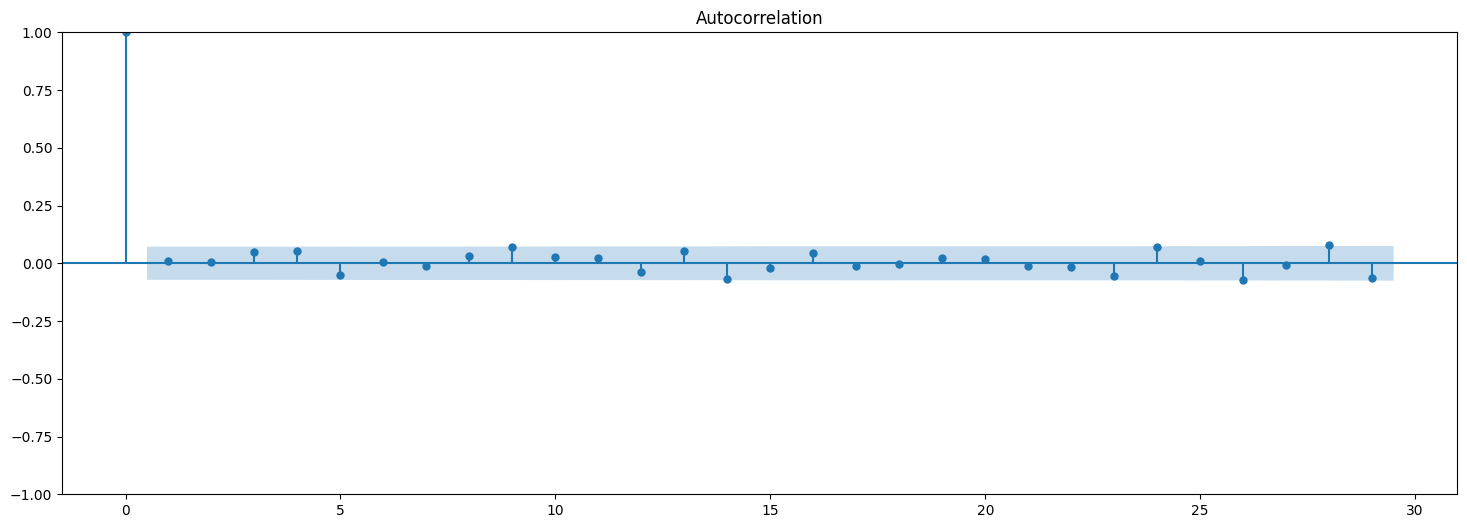

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF = Autocorrelação

plot_acf(hw_mult_model.resid)
plt.show()

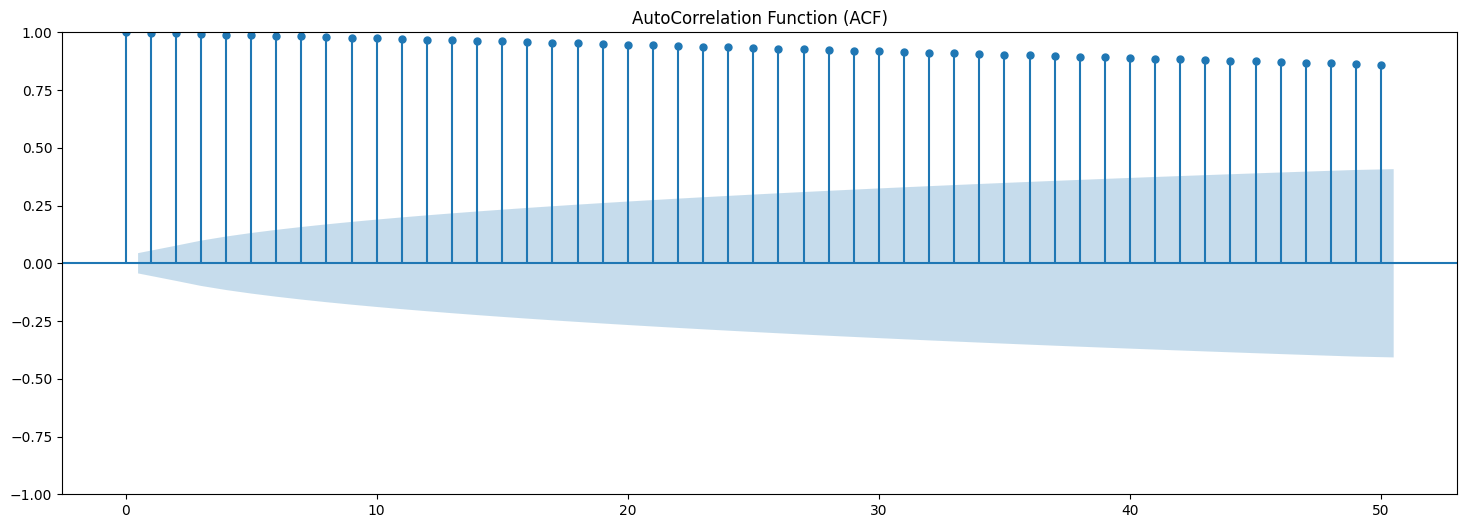

In [53]:
# ACF (AutoCorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bb_series, lags=50)
plt.title("AutoCorrelation Function (ACF)")
plt.show()

ACF Decai lentamente -> Indica não estacionariedade


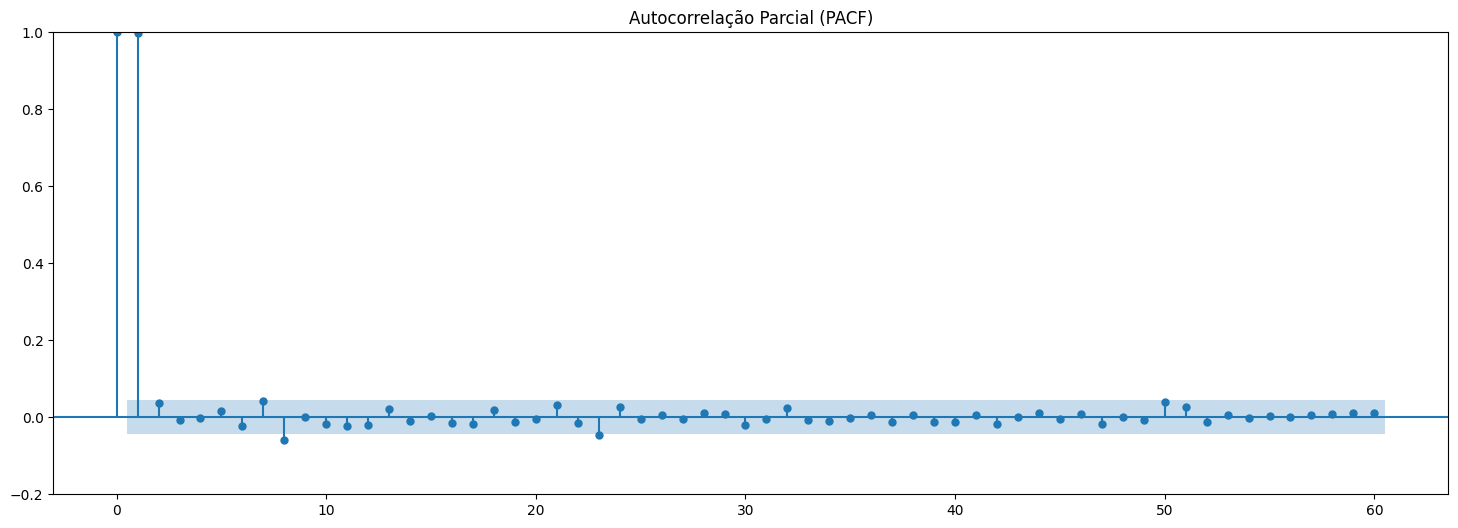

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Suponha que sua série já seja estacionária
plot_pacf(bb_series, lags=60, method='ywm')  # 'ywm' = método robusto
plt.title('Autocorrelação Parcial (PACF)')
plt.ylim([-0.2, 1])
plt.show()

Pico significativo em Lag 1, típico de uma série que precisa de diferenciação. Vamos fazer o teste de estacionariedade (Augmented Dickey-Fuller test)

In [ ]:
from statsmodels.tsa.stattools import adfuller

resultado_adf =  adfuller(bb_series)
adf_stat = resultado_adf[0]
p_value = resultado_adf[1]
print(p_value)

0.7245974910149602


- H0 = p-value < 0.05 -> Série Estacionária
- H1 = p-value > 0.05 -> Série não é estacionária e deve ser diferenciada.

Como o p-valor foi de 0.72 rejeita-se H0 e portanto a série não é estacionária e deve ser diferenciada.

In [37]:
bb_series_diff = bb_series.diff().dropna()

In [38]:
resultado_adf = adfuller(bb_series_diff)
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}')

ADF Statistic: -16.46285164575041
p-value: 2.3214277516695973e-29


Agora sim! p-valor é bem menor que 0.05 e portanto-se não rejeita H0 -> Série Estacionária

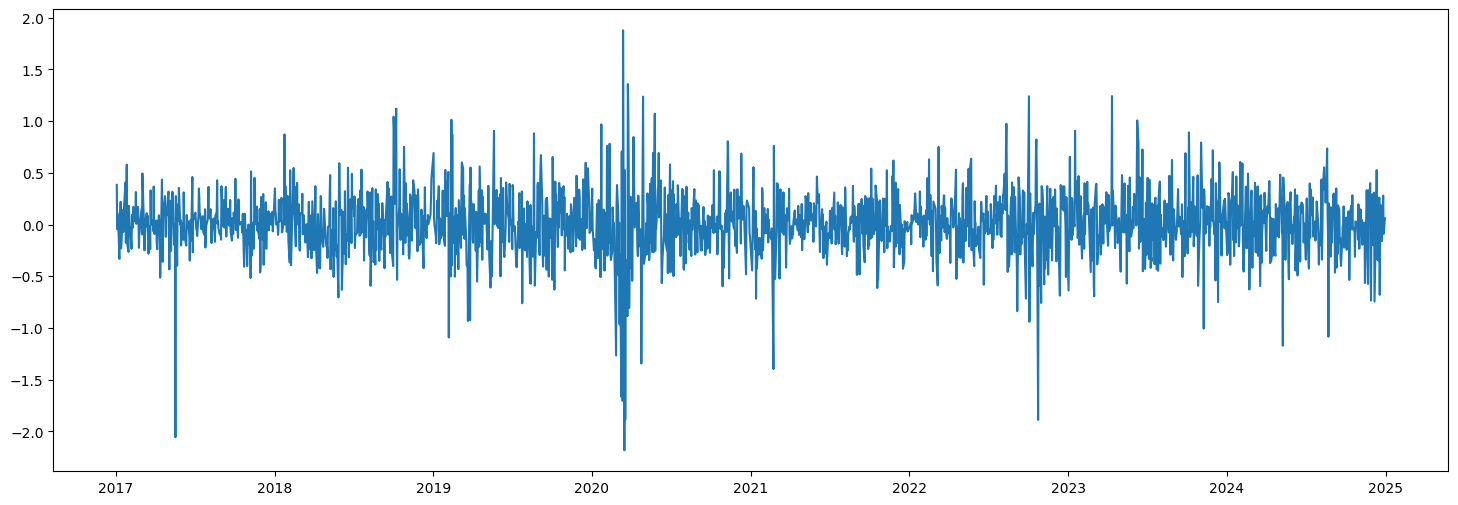

In [39]:
plt.plot(bb_series_diff)

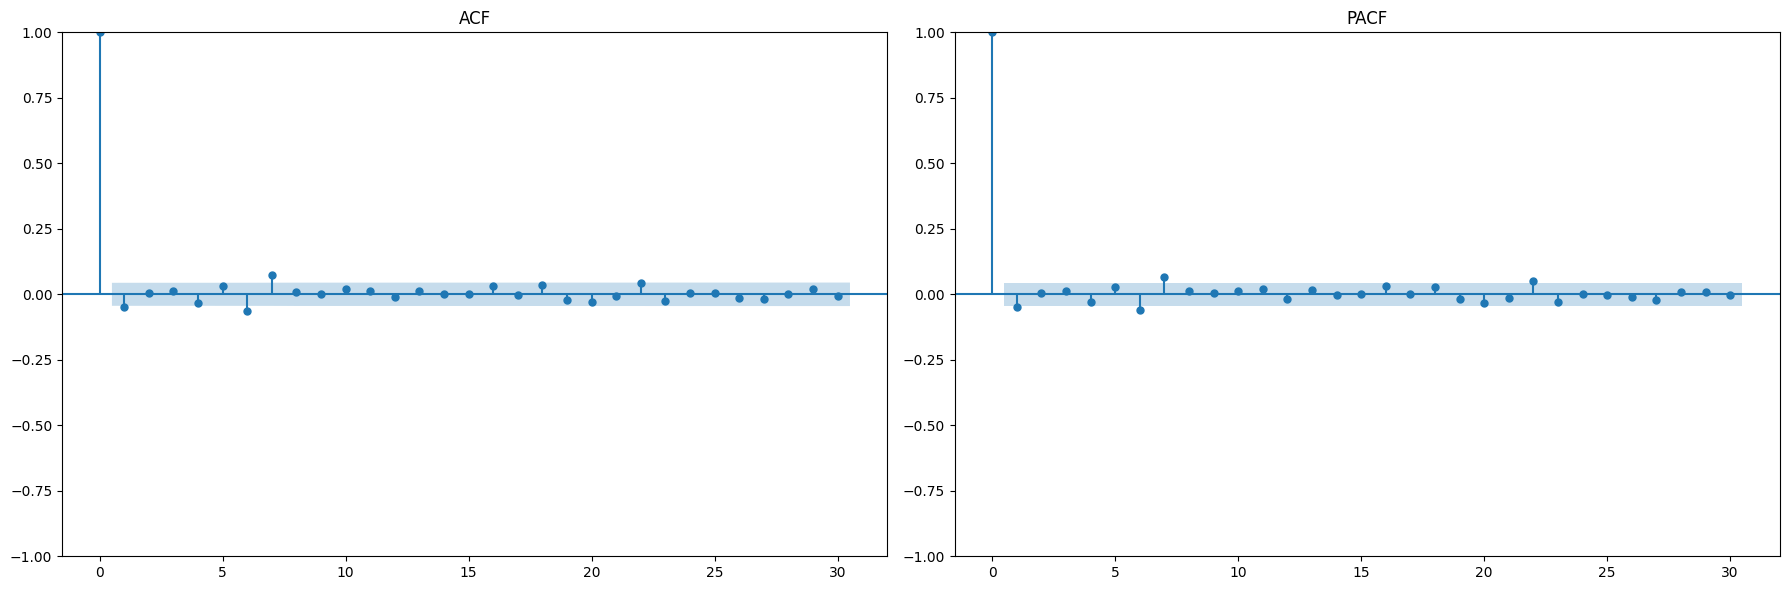

In [50]:
fig, axs = plt.subplots(1, 2)

plot_acf(bb_series_diff, lags=30, ax=axs[0])
axs[0].set_title("ACF")

plot_pacf(bb_series_diff, lags=30, ax=axs[1])
axs[1].set_title("PACF")

plt.tight_layout()
plt.show()

In [55]:
# Vamos fazer o autoarima

from pmdarima import auto_arima

auto_arima_model = auto_arima(bb_series_train, trace=True, seasonal=False, stepwise=True)
print(auto_arima_model.summary())

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=287.296, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=289.261, Time=0.07 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=289.259, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=287.611, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=291.200, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  745
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -141.648
Date:                dom, 25 mai 2025   AIC                            287.296
Time:                        19:56:44   BIC                            296.520
Sample:                             0   HQIC                           290.851
                                - 745                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Teste ljungbox

auto_arima_model_residuo = auto_arima_model.resid()

ljungbox_result = acorr_ljungbox(auto_arima_model_residuo, lags=30, return_df=True)
print(f'Resultado do teste Ljung-box: {ljungbox_result.lb_pvalue.values[0]}')

Resultado do teste Ljung-box: 0.7768530655872808


Teste Ljung-box nos resíduos

- H0: p-value > 0.05 -> Os resíduos são independentes (iid). O modelo está bem ajustado
- H1: p-value <= 0.05 -> Os resíduos não são independentes, o modelo possui falhas no ajuste. 

In [68]:
# Teste de normalidade nos resíduos (Kolmogorov-Smirnov)
from scipy.stats import kstest
ks_stat, p_value = kstest(auto_arima_model_residuo, 'norm', args=(np.mean(auto_arima_model_residuo), np.std(auto_arima_model_residuo)))
print(f'Teste de Kolmogorov-Smirnov para normalidade: p-valor = {p_value}')
if p_value > 0.01:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos não seguem uma distribuição normal.")

Teste de Kolmogorov-Smirnov para normalidade: p-valor = 2.3650101253919382e-26
Os resíduos não seguem uma distribuição normal.


Ideal é que siga.

In [69]:
from arch import arch_model

am = arch_model(auto_arima_model_residuo, vol="ARCH", p=1)
test_arch = am.fit(disp='off')
print(test_arch.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -164.213
Distribution:                  Normal   AIC:                           334.426
Method:            Maximum Likelihood   BIC:                           348.266
                                        No. Observations:                  745
Date:                dom, mai 25 2025   Df Residuals:                      744
Time:                        21:14:55   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.9146e-03  1.116e-02     -0.530      0.

p-valor foi 0.596 como o valor é superior a 0.05 então não há efeitos heteroscedásticos nos resíduos, então poderiam ser realizadas previsões para o modelo gerado.

In [60]:
predicts_auto_arima = auto_arima_model.predict(steps_ahead)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [61]:
predicts_auto_arima.index = bb_series_test.index

mape_auto_arima = mean_absolute_percentage_error(bb_series_test, predicts_auto_arima)

print(mape_auto_arima)

0.07916712072622166


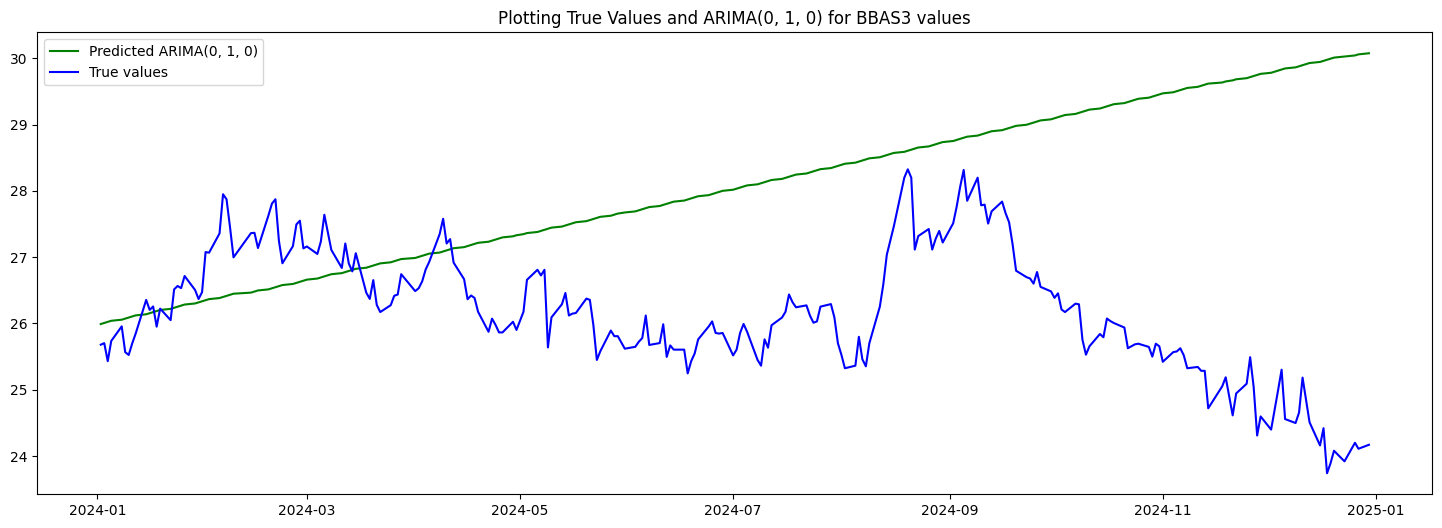

In [62]:
plt.plot(predicts_auto_arima, color='green', label='Predicted ARIMA(0, 1, 0)')
plt.plot(bb_series_test, color='blue', label="True values")
plt.legend()
plt.title("Plotting True Values and ARIMA(0, 1, 0) for BBAS3 values")
plt.legend()
plt.show()

ARIMA(0, 1, 0) is a random walk.

In [64]:
# Decomposição da série Temporal em seus componentes (Tendência, Sazonal e Resíduos)
from statsmodels.tsa.seasonal import seasonal_decompose

# decompa = seasonal_decompose(bb_series, model="additive", period=5)  # Método aditivo
decompa = seasonal_decompose(bb_series_diff, model="additive", period=5) # Método multiplicativo

print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05    0.015843
2017-01-06   -0.037778
2017-01-09   -0.010358
                ...   
2024-12-20   -0.044000
2024-12-23    0.074000
2024-12-26    0.056000
2024-12-27         NaN
2024-12-30         NaN
Name: trend, Length: 1991, dtype: float64
Date
2017-01-03   -0.000688
2017-01-04   -0.005027
2017-01-05   -0.006754
2017-01-06    0.005765
2017-01-09    0.006703
                ...   
2024-12-20   -0.005027
2024-12-23   -0.006754
2024-12-26    0.005765
2024-12-27    0.006703
2024-12-30   -0.000688
Name: seasonal, Length: 1991, dtype: float64
Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05   -0.030413
2017-01-06    0.126458
2017-01-09   -0.328429
                ...   
2024-12-20    0.239027
2024-12-23   -0.227246
2024-12-26    0.218235
2024-12-27         NaN
2024-12-30         NaN
Name: resid, Length: 1991, dtype: float64


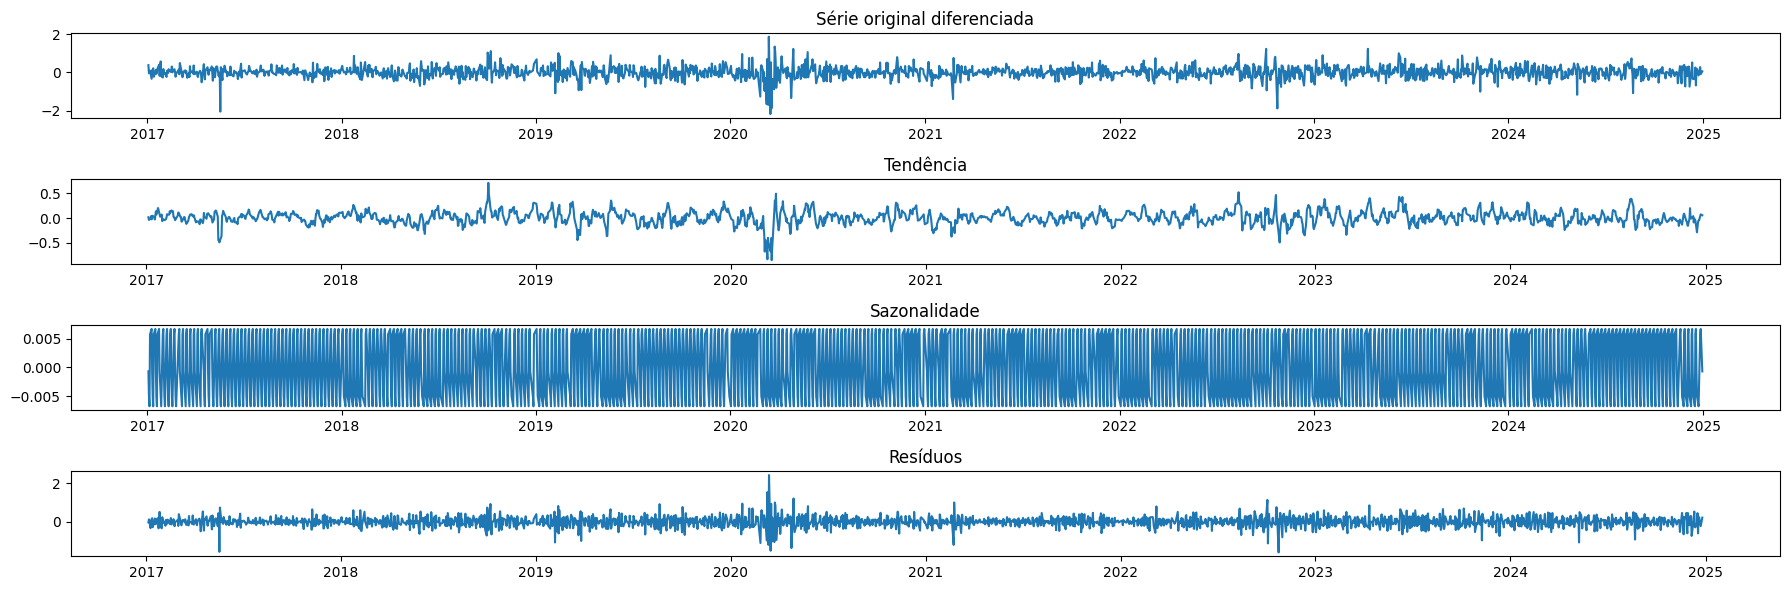

In [65]:
plt.subplot(4, 1, 1)
plt.plot(bb_series_diff)
plt.title("Série original diferenciada")

plt.subplot(4, 1, 2)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(4, 1, 3)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(4, 1, 4)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.tight_layout()
plt.show()